Data preparation

In [1]:
import pandas as pd
import os


In [1]:
!pwd

/Users/avivsimontahar/Documents/mlops_course/Churn-MLOps-Envelope/notebooks


In [3]:
path = os.path.join(os.path.join('/Users/avivsimontahar/Documents/mlops_course/Churn-MLOps-Envelope/src/prediction_model/data', 'dataset_input_tiny.csv'))
dataset = pd.read_csv(path)

In [4]:
dataset.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75


In [5]:
# Nulls:
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(2279) # 2279 mean value in data    
# dataset['TotalCharges'] = dataset['TotalCharges'].str.replace(' ','2279') # remove space string in data
dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)

# Contract is a importnent feature in the model and cant be null, in case of null the model will not predict and need to sand alert.
dataset['Contract'] = dataset['Contract'].dropna()

dataset['PhoneService'].fillna('No')

dataset['tenure'] = dataset['tenure'].fillna(dataset['tenure'].mean())

In [7]:
dataset.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [8]:
# Feature handeling:
dataset['PhoneService'] = dataset['PhoneService'].map({'Yes':1,'No':0})

dataset = dataset.join(pd.get_dummies(dataset['Contract']).astype(int))
dataset.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Month-to-month', 'One year'],
      dtype='object')

In [14]:
dataset.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Month-to-month,One year
0,0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,0
1,1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1
2,2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0
3,3,7795-CFOCW,Male,0,No,No,45,0,No phone service,DSL,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1


In [9]:
import pickle
# TEST TO RUN MODEL
result_columns = ['TotalCharges','Month-to-month','One year','PhoneService','tenure']

model_path = path = os.path.join(os.path.join('/Users/avivsimontahar/Documents/mlops_course/Churn-MLOps-Envelope/src/prediction_model/models', 'churn_model.pickle'))
with open(model_path, 'rb') as f:
    rf_model = pickle.load(f)

rf_model.predict(dataset[result_columns])

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Two year


Unique values and their counts:
Contract
Month-to-month    0.553256
Two year          0.243679
One year          0.203066
Name: proportion, dtype: float64


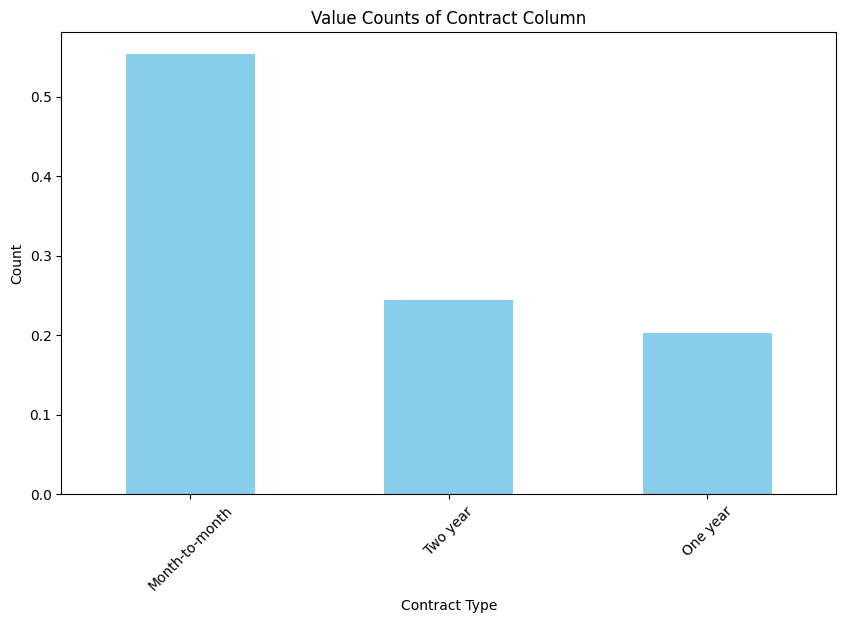

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_path = '/Users/avivsimontahar/Documents/mlops_course/Churn-MLOps-Envelope/external_data_app/original_dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Check if the 'Contract' column exists in the DataFrame
if 'Contract' in df.columns:
    # Calculate the unique values and their counts
    unique_values_counts = df['Contract'].value_counts(normalize=True)
    
    # Display results
    print("Unique values and their counts:")
    print(unique_values_counts)
    
    # Plotting the bar plot
    plt.figure(figsize=(10, 6))
    unique_values_counts.plot(kind='bar', color='skyblue')
    plt.title('Value Counts of Contract Column')
    plt.xlabel('Contract Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("'Contract' column not found in the DataFrame.")